Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [ ]:
NAME = "Nhat Pham"
COLLABORATORS = ""

---

# CS110 Pre-class Work 11.1

The pre-class work for this session will focus on the rod cutting problem. Recall that the rod cutting problem takes as an input the length n of a rodand a table of prices $p_i$ for $i = 1,2,... n$, and one needs to determine the maximum revenue $r$ obtainable by cutting up the rod and selling the pieces. 

## Part A. 

You will implement in Python two solutions to the rod cutting problem, namely:

## Question 1. 
A recursive top-down solution to the rod cutting problem. Please complete the cut_rod function below:


In [10]:
def cut_rod(p,n):
    """
    A recursive top-down solution to the rod cutting problem as described in 
    Cormen et. al. (pp 363) This calculates the maximum revenue that could be 
    earned by cutting up a rod of length n.
    
    Inputs;:
    - p: list of floats, the prices of rods of different lengths. p[i] gives the dollars
    of revenue the company earns selling a rod of length i+1.
    - n: int, length of the rod
    
    Outputs:
    - q: float, the optimal revenue
    """
    # YOUR CODE HERE
    if n==0:
        return 0
    q = float('-inf')
    for i in range(1,n+1):
        #because of the indexing mechanism in Python, p[i-1] is used
        #instead of p[i] as in the text book
        q = max(q, p[i-1] + cut_rod(p,n-i))
    return q
#     raise NotImplementedError()
    

In [12]:
# price list from textbook
p = [1,5,8,9,10,17,17,20,24,30] #p[i] gives the price of length i+1

#results from textbook
r = [0,1,5,8,10,13,17,18,22,25,30]
for i in range(len(r)):
    assert(cut_rod(p,i)==r[i])

## Question 2.

An optimal rod cutting solution using dynamic programming (see figure [here](https://drive.google.com/open?id=1nu9gETKX4KJCHZDi17fZLQtkDVig81Zk) for inspiration). Please complete the following two functions: 


In [26]:
def extended_bottom_up_cut_rod(p,n):
    """
    Implements a bottom-up dynamic programming approach to the rod cutting problem.
    Here, "extended" means the function is geared in a way amenable to reconstructing
    an optimal solution, on top of the returned optimal value. See Cormen et al.,
    p. 269 for the implementation details.
    
    Inputs:
    - p: list of floats, the prices of rods of different lengths. p[i] gives the dollars
    of revenue the company earns selling a rod of length i+1.
    - n: int, length of the rod
    
    Outputs:
    - r: list of floats, the maximum revenues. r[i] gives the maximum revenue for a rod
    of length i. As such:
        * r[0] = 0
        * len(r) == n + 1
    - s: list of ints, the optimal sizes of the first piece to cut off. Also make sure 
    that:
        * s[0] = 0
        * len(s) == n + 1
    """
    r, s = [float('inf')]*(n+1), [float('inf')]*(n+1)
    r[0], s[0] = 0, 0
    for j in range(1,n+1):
        q = float('-inf')
        for i in range(1,j+1):
            if q < p[i-1]+r[j-i]:
                q = p[i-1]+r[j-i]
                s[j] = i
        r[j] = q
    return(r,s)
#     raise NotImplementedError()

In [27]:
def print_cut_rod_solution(p,n):
    """
    Gives a solution to the rod cutting problem of size n. 
    
    Inputs:
    - p: list of floats, the prices of rods of different lengths. p[i] gives the revenue (in USD, for example) the company earns selling a rod of length i+1.
    - n: int, length of the rod
    
    Outputs:
    - sol: a list of ints, indicating how to cut the rod. Cutting the rod with the lengths
    given in sol gives the optimal revenue.
        * print_cut_rod_solution(p,0) == []
    """
    # YOUR CODE HERE
    r,s = extended_bottom_up_cut_rod(p,n)
    while n > 0:
        print(s[n])
        n = n-s[n]
#     raise NotImplementedError()


In [29]:
# price list from textbook
p = [1,5,8,9,10,17,17,20,24,30] #p[i] gives the price of length i+1
# Result of R and S from textbook:
R = [0,1,5,8,10,13,17,18,22,25,30]
S = [0,1,2,3,2,2,6,1,2,3,10]
# Test:
r, s = extended_bottom_up_cut_rod(p,10)
assert(r==R)
assert(s==S)

## Part B - Experiments

## Question 1.

Use the function below to generate a list of prices of length n=20 and assign that list to a new variable, `P`. You MUST use this list for parts 2 and 3 below.


In [30]:
import numpy as np
def generate_price_list(n):
    """Generates a price list of length n
    
    Inputs:
    - n: integer, length of the list, must be positive
    
    Outputs:
    - p: list, the ordered price list for each rod cut
    """
    p = [1]
    for i in range(1,n):
        np.random.seed(0)
        p.append(np.random.randint(p[i-1]+1, i*3+1))
    return p


## Question 2.

Time (using the time library) the implementation of `cut_rod` for different rod lengths for values of up to $n=20.$ Present your results in a plot. 


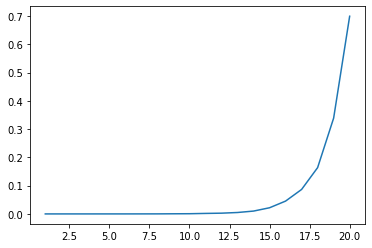

In [40]:
import time
import matplotlib.pyplot as plt
ave_running = []
for n in range(1,21):
    p = generate_price_list(n)
    running = []
    for _ in range(20):
        start = time.time()
        cut_rod(p,n)
        end = time.time()
        running.append(end-start)
    ave_running.append(sum(running)/len(running))
plt.plot(list(range(1,21)),ave_running)


# raise NotImplementedError()

## Question 3.

Time (using the time library) the implementation of `extended_bottom_up_cut_rod` for different rod lengths for values of up to $n=20$. Add the curve corresponding to this algorithm to the previous plot.

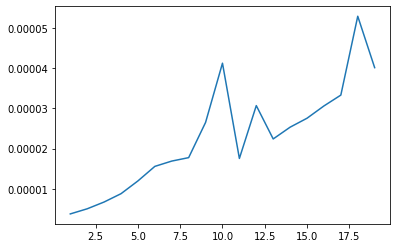

In [53]:
import time
import matplotlib.pyplot as plt
ext_ave_running = []
for n in range(1,20):
    p = generate_price_list(n)
    running = []
    for _ in range(20):
        start = time.time()
        extended_bottom_up_cut_rod(p,n)
        end = time.time()
        running.append(end-start)
    ext_ave_running.append(sum(running)/len(running))

plt.plot(list(range(1,20)),ext_ave_running)

## Question 4.

Contrast both curves. What can you conclude?

YOUR ANSWER HERE

## Part C - After completing your experiments above, answer the following questions:

## Question 1.
Estimate how big $n$ has to be before the non-dynamic-programming version will take a million years to finish. Call this value N.

let 10^-4 be the time to execute one operation. The total time to run the non-dynamic program on N is 10^-4*2^N/2 = 1 million year  -> N~62

## Question 2.
Estimate (or time) how long it takes to evaluate `extended_bottom_up_cut_rod(p,N)`, where `N` is the value you got from the previous question. 

let t be the time to execute one operation. The total time to run the non-dynamic program on N is 10^-4*N^2/ ~= 0.389(s)

## [Optional]  Question 3. 
Do you notice anything peculiar about the solution for large n?

YOUR ANSWER HERE